In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.style.use('ggplot')
import nltk

In [5]:
data = pd.read_csv('/content/bank-full.csv',delimiter=';')
data.rename(columns={'y':'deposit'}, inplace=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


number of row and column in dataset


In [8]:
data.shape

(10344, 17)

In [10]:
data.columns # column names

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [11]:
data.dtypes # checking for data types

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day          float64
month         object
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome      object
deposit       object
dtype: object

In [12]:
data.dtypes.value_counts() # value count of data type

object     10
float64     5
int64       2
dtype: int64

In [13]:
data.info() #information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10344 entries, 0 to 10343
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10344 non-null  int64  
 1   job        10344 non-null  object 
 2   marital    10344 non-null  object 
 3   education  10344 non-null  object 
 4   default    10344 non-null  object 
 5   balance    10344 non-null  int64  
 6   housing    10344 non-null  object 
 7   loan       10343 non-null  object 
 8   contact    10343 non-null  object 
 9   day        10343 non-null  float64
 10  month      10343 non-null  object 
 11  duration   10343 non-null  float64
 12  campaign   10343 non-null  float64
 13  pdays      10343 non-null  float64
 14  previous   10343 non-null  float64
 15  poutcome   10343 non-null  object 
 16  deposit    10343 non-null  object 
dtypes: float64(5), int64(2), object(10)
memory usage: 1.3+ MB


data cleaning and data preprocessing

handling duplicated values

In [14]:
# checking for duplicates
data.duplicated().sum()


0

In [15]:
data.isna().sum() # handling null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         1
contact      1
day          1
month        1
duration     1
campaign     1
pdays        1
previous     1
poutcome     1
deposit      1
dtype: int64

In [19]:
data.dropna(inplace = True)
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [21]:
cat_cols = data.select_dtypes(include='object').columns
print(cat_cols)
num_cols = data.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [22]:
data.describe() # descriptive statistical analysis

,age,balance,day,duration,campaign,pdays,previous
count,10343.000000,10343.000000,10343.000000,10343.000000,10343.000000,10343.0,10343.0
mean,39.902833,1137.474330,14.924200,261.647008,2.638693,-1.0,0.0
std,9.342426,2653.299505,8.918205,251.342621,3.019482,0.0,0.0
min,20.000000,-3372.000000,2.000000,0.000000,1.000000,-1.0,0.0
25%,32.000000,47.000000,7.000000,112.000000,1.000000,-1.0,0.0
50%,39.000000,360.000000,14.000000,188.000000,2.000000,-1.0,0.0
75%,47.000000,1163.500000,23.000000,319.000000,3.000000,-1.0,0.0
max,61.000000,58544.000000,30.000000,3881.000000,63.000000,-1.0,0.0


In [23]:
data.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10343,10343,10343,10343,10343,10343,10343,10343,10343,10343
unique,12,3,4,2,2,2,1,2,1,2
top,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
freq,3298,6322,5842,10116,8504,8838,10343,7957,10343,9976


data visualization


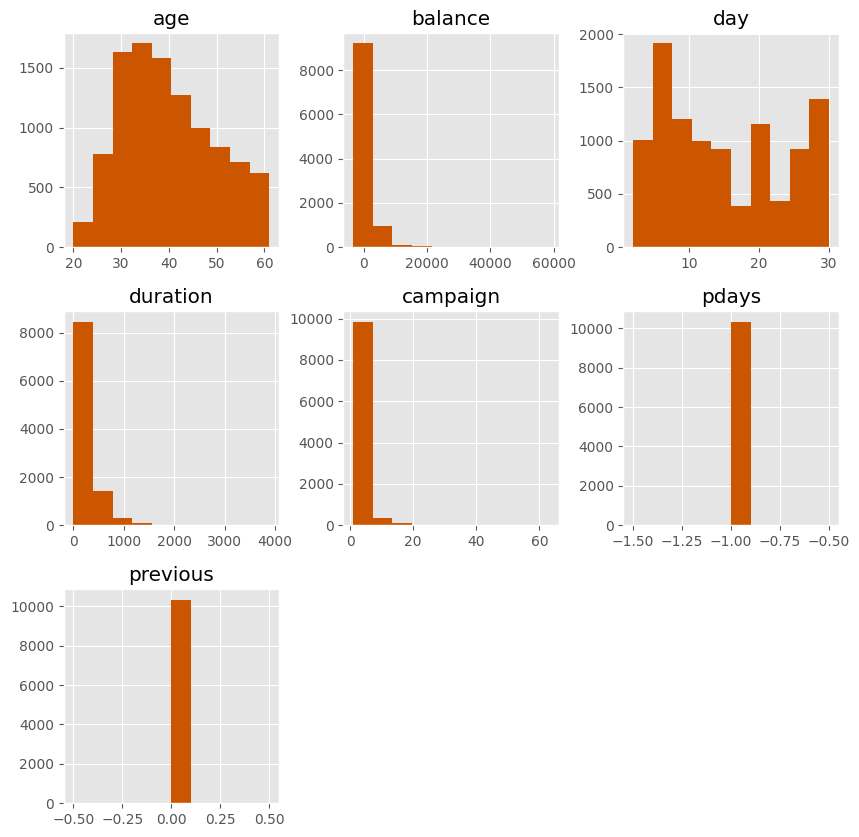

In [24]:
data.hist(figsize = (10,10),color='#cc5500')
plt.show()

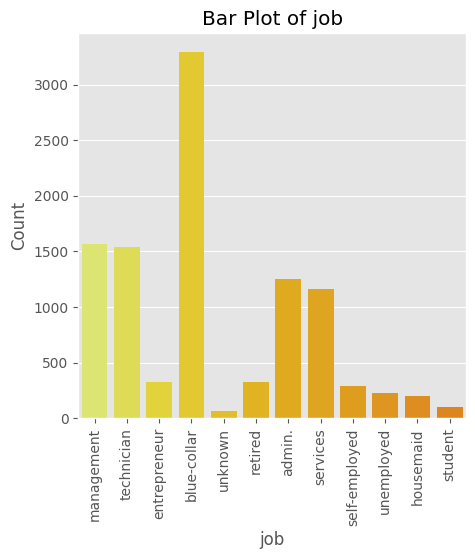

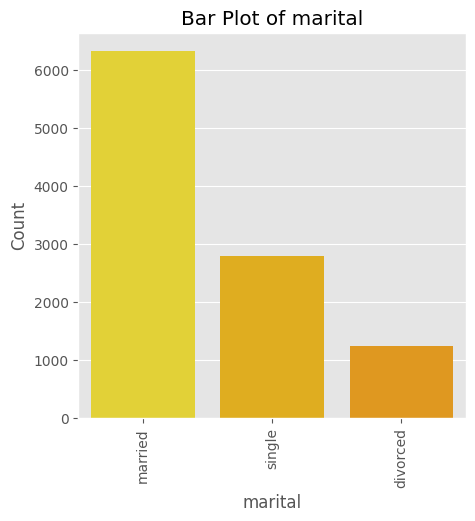

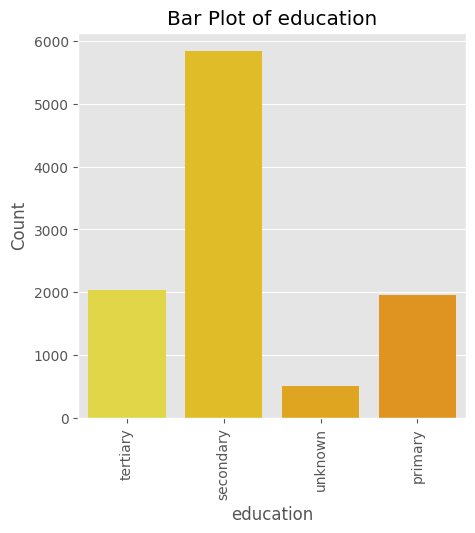

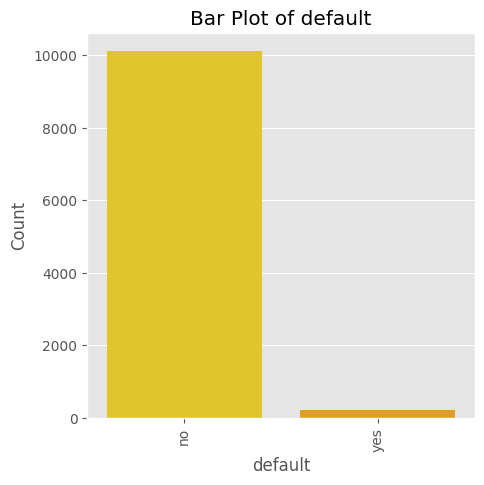

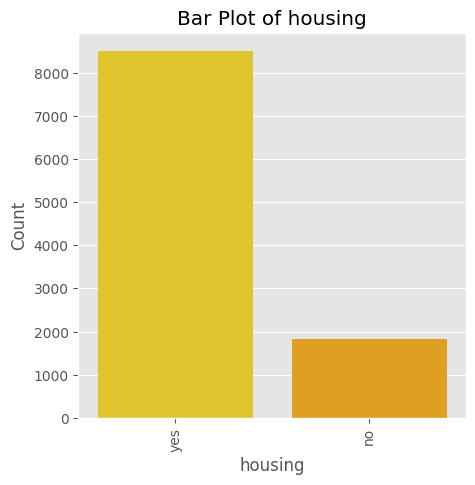

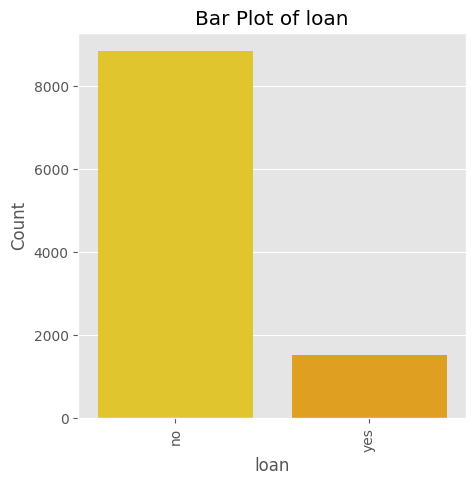

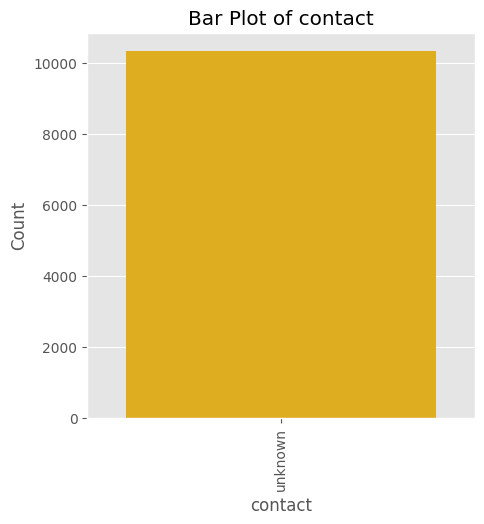

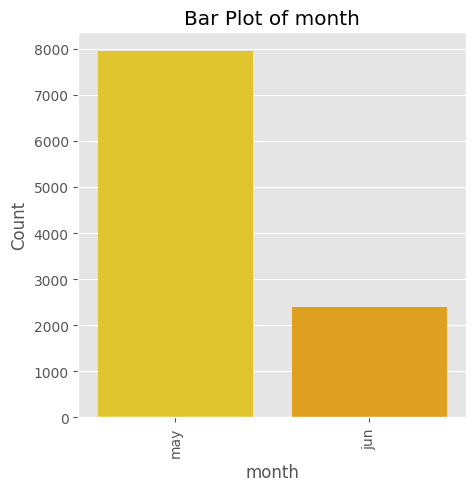

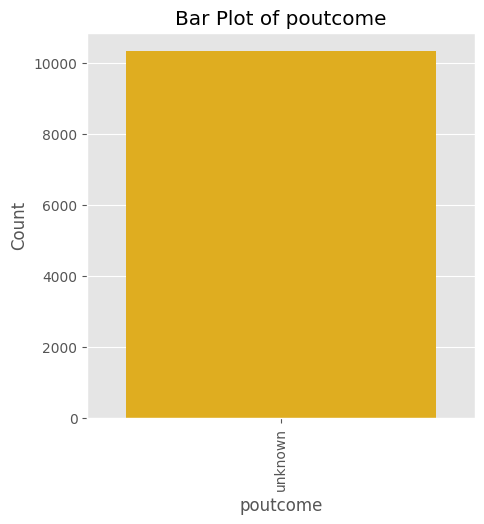

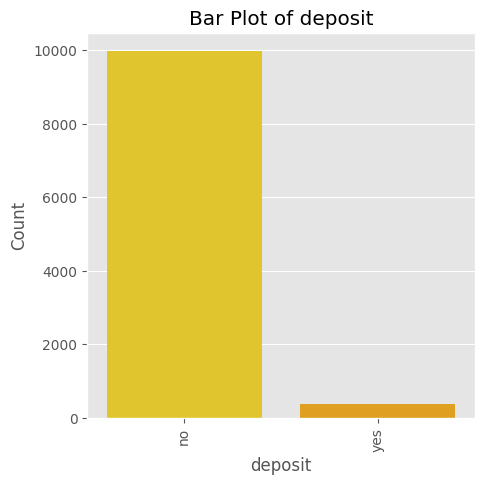

In [26]:
for feature in cat_cols:
    plt.figure(figsize=(5,5))  # Adjust the figure size as needed
    sns.countplot(x=feature, data=data, palette='Wistia')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

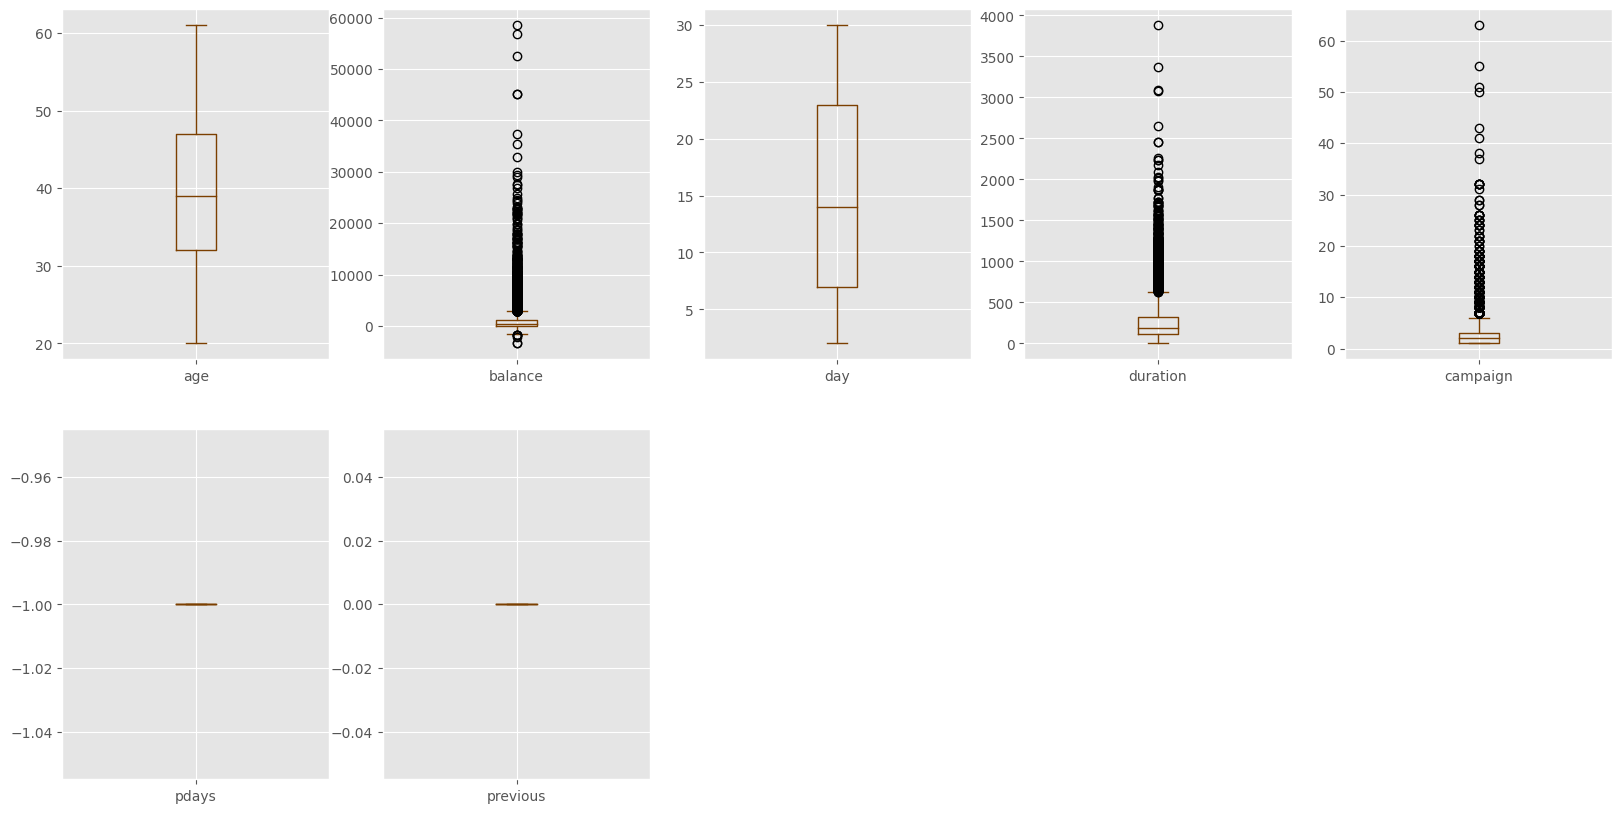

In [27]:
data.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#7b3f00')
plt.show()

In [28]:
column = data[['age','campaign','duration']]
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]

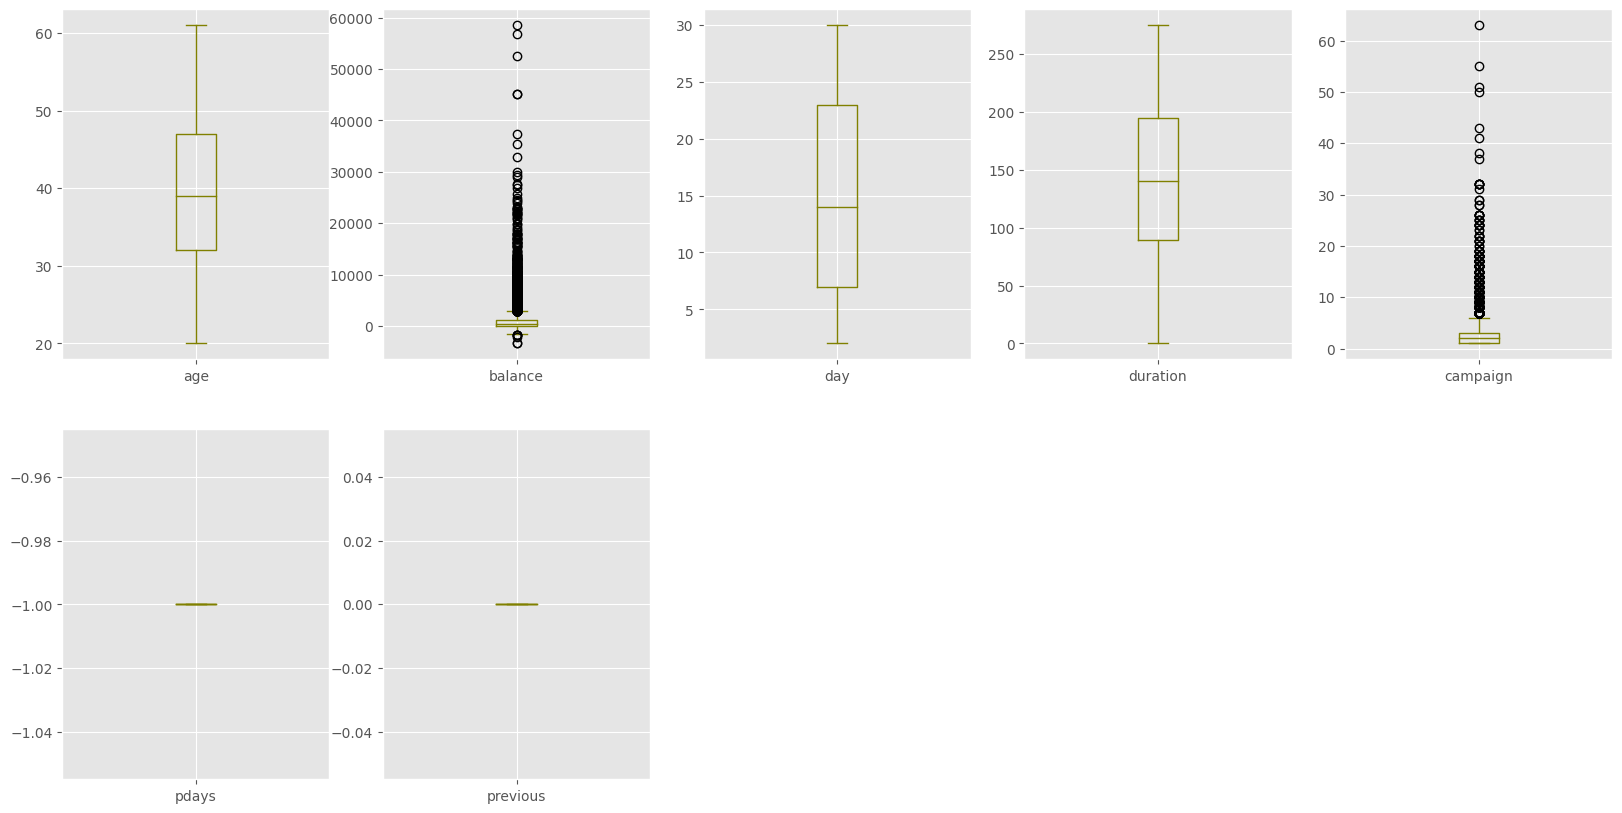

In [29]:
data.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#808000')
plt.show()


<Axes: xlabel='loan', ylabel='count'>

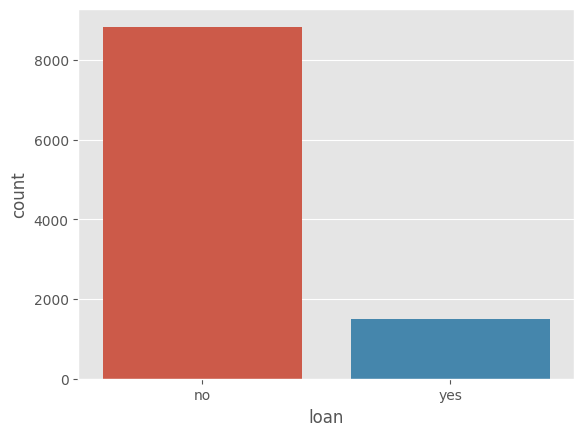

In [34]:
sns.countplot(x='loan',data=data)

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

In [32]:
data['no_loan']=0

In [36]:
le=LabelEncoder()
data["loan"] = le.fit_transform(data["loan"])
data["housing"]=le.fit_transform(data["housing"])

In [37]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,no_loan
0,58,management,married,tertiary,no,2143,1,0,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no,0
1,44,technician,single,secondary,no,29,1,0,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,1,1,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,1,0,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no,0
4,33,unknown,single,unknown,no,1,0,0,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10338,37,housemaid,married,secondary,no,187,0,0,unknown,12.0,jun,165.0,1.0,-1.0,0.0,unknown,no,0
10339,57,entrepreneur,married,unknown,no,657,0,0,unknown,12.0,jun,NaN,1.0,-1.0,0.0,unknown,no,0
10340,58,retired,married,primary,no,657,1,0,unknown,12.0,jun,128.0,2.0,-1.0,0.0,unknown,no,0
10341,36,blue-collar,married,primary,no,398,1,0,unknown,12.0,jun,NaN,1.0,-1.0,0.0,unknown,no,0


In [38]:
data['no_loan']=data['loan']+data['housing']
data['no_loan']=data['no_loan']==0

In [39]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,no_loan
0,58,management,married,tertiary,no,2143,1,0,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no,False
1,44,technician,single,secondary,no,29,1,0,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no,False
2,33,entrepreneur,married,secondary,no,2,1,1,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no,False
3,47,blue-collar,married,unknown,no,1506,1,0,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no,False
4,33,unknown,single,unknown,no,1,0,0,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10338,37,housemaid,married,secondary,no,187,0,0,unknown,12.0,jun,165.0,1.0,-1.0,0.0,unknown,no,True
10339,57,entrepreneur,married,unknown,no,657,0,0,unknown,12.0,jun,NaN,1.0,-1.0,0.0,unknown,no,True
10340,58,retired,married,primary,no,657,1,0,unknown,12.0,jun,128.0,2.0,-1.0,0.0,unknown,no,False
10341,36,blue-collar,married,primary,no,398,1,0,unknown,12.0,jun,NaN,1.0,-1.0,0.0,unknown,no,False


In [40]:
data.no_loan.value_counts()

False    8679
True     1664
Name: no_loan, dtype: int64

In [43]:
data.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration     3192
campaign        0
pdays           0
previous        0
poutcome        0
deposit         0
no_loan         0
dtype: int64

In [45]:
data['duration'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10338    False
10339     True
10340    False
10341     True
10342     True
Name: duration, Length: 10343, dtype: bool

In [46]:
data = data.dropna(axis=0)

In [50]:
data.isnull().value_counts()

age    job    marital  education  default  balance  housing  loan   contact  day    month  duration  campaign  pdays  previous  poutcome  deposit  no_loan
False  False  False    False      False    False    False    False  False    False  False  False     False     False  False     False     False    False      7151
dtype: int64

<Axes: xlabel='no_loan', ylabel='count'>

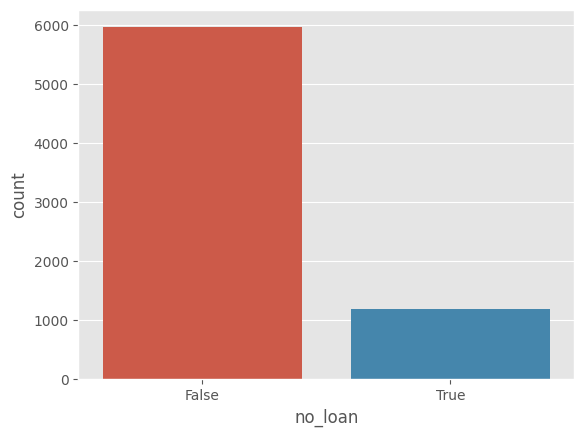

In [51]:
sns.countplot(x='no_loan',data=data)

In [53]:
data['phl']=0

In [54]:
data['phl']=data['loan']+data['housing']
data['phl']=data['phl']==2

In [55]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,no_loan,phl
0,58,management,married,tertiary,no,2143,1,0,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no,False,False
1,44,technician,single,secondary,no,29,1,0,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no,False,False
2,33,entrepreneur,married,secondary,no,2,1,1,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no,False,True
3,47,blue-collar,married,unknown,no,1506,1,0,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no,False,False
4,33,unknown,single,unknown,no,1,0,0,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10333,43,services,married,secondary,no,2478,1,0,unknown,12.0,jun,157.0,1.0,-1.0,0.0,unknown,no,False,False
10334,53,self-employed,married,tertiary,no,4397,1,0,unknown,12.0,jun,252.0,1.0,-1.0,0.0,unknown,no,False,False
10336,45,housemaid,divorced,primary,no,221,0,0,unknown,12.0,jun,93.0,1.0,-1.0,0.0,unknown,no,True,False
10338,37,housemaid,married,secondary,no,187,0,0,unknown,12.0,jun,165.0,1.0,-1.0,0.0,unknown,no,True,False


In [56]:
data.phl.value_counts()

False    6219
True      932
Name: phl, dtype: int64

<Axes: xlabel='phl', ylabel='count'>

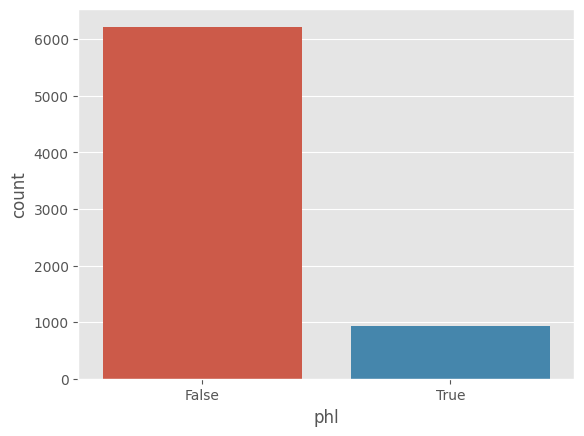

In [57]:
sns.countplot(x='phl',data=data)

In [63]:
data['deposit'].value_counts()

no     7146
yes       5
Name: deposit, dtype: int64

Text(0.5, 0, 'deposit')

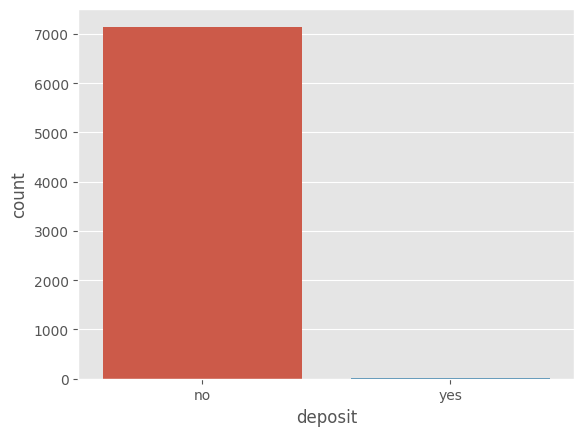

In [65]:
sns.countplot(x='deposit',data=data)
plt.xlabel('deposit')

In [66]:
data.default.value_counts()

no     6996
yes     155
Name: default, dtype: int64

<Axes: xlabel='default', ylabel='count'>

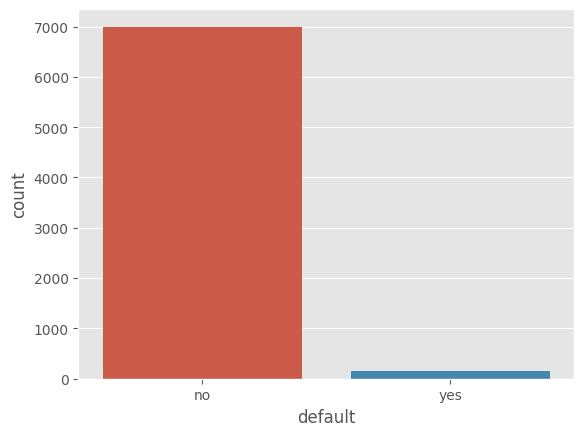

In [67]:
sns.countplot(x='default',data=data)

In [68]:
data.contact.value_counts()

unknown    7151
Name: contact, dtype: int64

In [69]:
data.campaign.value_counts()

1.0     2866
2.0     1936
3.0      936
4.0      505
5.0      272
6.0      167
7.0       94
8.0       73
9.0       59
10.0      45
11.0      36
13.0      24
12.0      22
16.0      17
14.0      15
18.0      13
15.0      11
17.0      11
19.0       6
24.0       6
26.0       6
21.0       5
32.0       5
25.0       3
22.0       3
23.0       2
20.0       2
29.0       2
43.0       1
51.0       1
63.0       1
41.0       1
28.0       1
50.0       1
38.0       1
31.0       1
37.0       1
Name: campaign, dtype: int64

<Axes: xlabel='campaign', ylabel='count'>

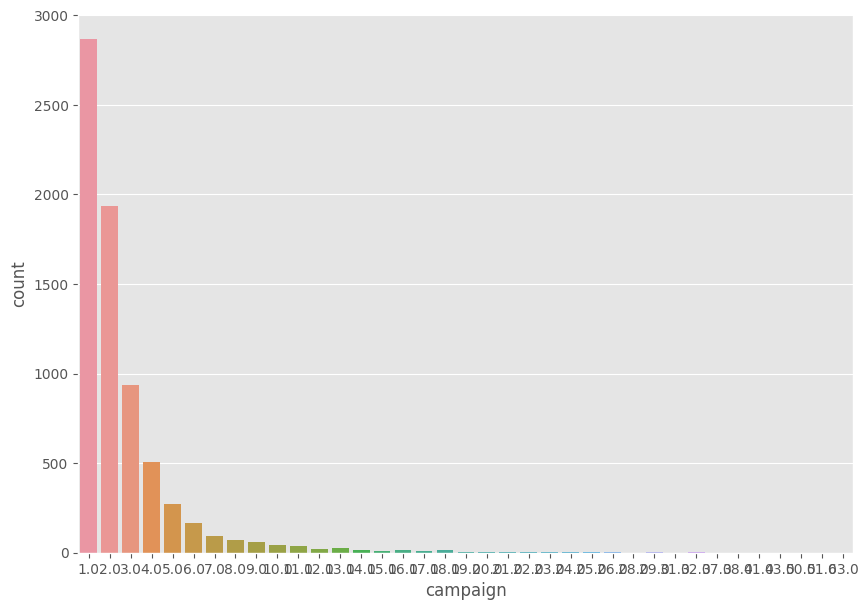

In [70]:
plt.figure(figsize=(10,7))
sns.countplot(x='campaign',data=data)

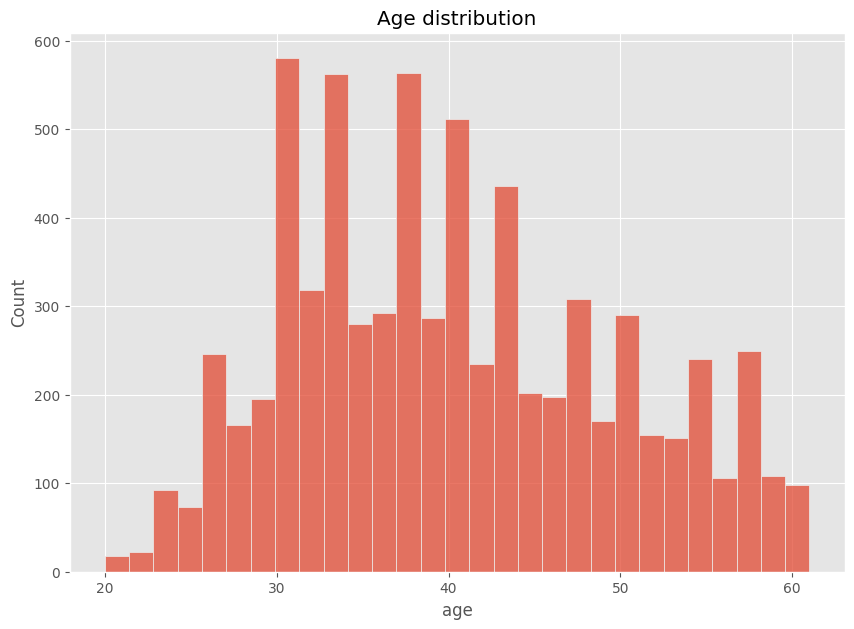

In [71]:
plt.figure(figsize=(10,7))
sns.histplot(data['age'])
plt.title("Age distribution")
plt.show()

In [73]:
data['Income_group']=pd.cut(data['balance'],bins=[-15000,500,1500,72000],labels=['Low','Mid','High'])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,no_loan,phl,Income_group
0,58,management,married,tertiary,no,2143,1,0,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no,False,False,High
1,44,technician,single,secondary,no,29,1,0,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no,False,False,Low
2,33,entrepreneur,married,secondary,no,2,1,1,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no,False,True,Low
3,47,blue-collar,married,unknown,no,1506,1,0,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no,False,False,High
4,33,unknown,single,unknown,no,1,0,0,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no,True,False,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10333,43,services,married,secondary,no,2478,1,0,unknown,12.0,jun,157.0,1.0,-1.0,0.0,unknown,no,False,False,High
10334,53,self-employed,married,tertiary,no,4397,1,0,unknown,12.0,jun,252.0,1.0,-1.0,0.0,unknown,no,False,False,High
10336,45,housemaid,divorced,primary,no,221,0,0,unknown,12.0,jun,93.0,1.0,-1.0,0.0,unknown,no,True,False,Low
10338,37,housemaid,married,secondary,no,187,0,0,unknown,12.0,jun,165.0,1.0,-1.0,0.0,unknown,no,True,False,Low


In [75]:
data.Income_group.value_counts()

Low     4180
Mid     1547
High    1424
Name: Income_group, dtype: int64

<Axes: xlabel='Income_group', ylabel='count'>

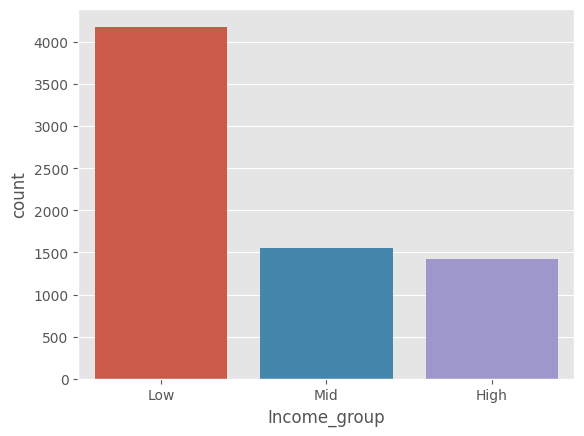

In [76]:
sns.countplot(x='Income_group',data=data)

In [78]:
data.drop(['pdays','previous','poutcome','Income_group','no_loan','phl'],axis=1 , inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,deposit
0,58,management,married,tertiary,no,2143,1,0,unknown,5.0,may,261.0,1.0,no
1,44,technician,single,secondary,no,29,1,0,unknown,5.0,may,151.0,1.0,no
2,33,entrepreneur,married,secondary,no,2,1,1,unknown,5.0,may,76.0,1.0,no
3,47,blue-collar,married,unknown,no,1506,1,0,unknown,5.0,may,92.0,1.0,no
4,33,unknown,single,unknown,no,1,0,0,unknown,5.0,may,198.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10333,43,services,married,secondary,no,2478,1,0,unknown,12.0,jun,157.0,1.0,no
10334,53,self-employed,married,tertiary,no,4397,1,0,unknown,12.0,jun,252.0,1.0,no
10336,45,housemaid,divorced,primary,no,221,0,0,unknown,12.0,jun,93.0,1.0,no
10338,37,housemaid,married,secondary,no,187,0,0,unknown,12.0,jun,165.0,1.0,no


In [79]:
le=LabelEncoder()

In [87]:
data["job"] = le.fit_transform(data["job"])
data["marital"] = le.fit_transform(data["marital"])
data["education"] = le.fit_transform(data["education"])
data["default"] = le.fit_transform(data["default"])
data["contact"] = le.fit_transform(data["contact"])
data["month"] = le.fit_transform(data["month"])
data['deposit'] = le.fit_transform(data['deposit'])


In [88]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,deposit
0,58,4,1,2,0,2143,1,0,0,5.0,1,261.0,1.0,0
1,44,9,2,1,0,29,1,0,0,5.0,1,151.0,1.0,0
2,33,2,1,1,0,2,1,1,0,5.0,1,76.0,1.0,0
3,47,1,1,3,0,1506,1,0,0,5.0,1,92.0,1.0,0
4,33,11,2,3,0,1,0,0,0,5.0,1,198.0,1.0,0


In [89]:
# creating train and test dataset
x=data.drop('default',axis=1)
y=data['default']

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train


,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,deposit
4197,27,1,1,1,72,1,0,0,19.0,1,105.0,1.0,0
836,30,7,2,1,-174,1,0,0,7.0,1,113.0,1.0,0
81,47,7,0,1,164,0,0,0,5.0,1,212.0,1.0,0
4657,46,4,1,2,477,1,0,0,20.0,1,128.0,6.0,0
1159,29,0,2,1,1117,1,0,0,8.0,1,77.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,39,0,1,1,-288,0,0,0,23.0,1,151.0,9.0,0
7595,40,1,1,1,737,1,0,0,30.0,1,135.0,2.0,0
7646,37,4,2,1,3167,1,0,0,30.0,1,197.0,1.0,0
7880,44,0,2,1,946,1,0,0,30.0,1,181.0,4.0,0


DECISION TREE CLASSIFIER

In [91]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [92]:
dtc_pred=dtc.predict(x_test)

In [93]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1398
           1       0.15      0.15      0.15        33

    accuracy                           0.96      1431
   macro avg       0.56      0.57      0.56      1431
weighted avg       0.96      0.96      0.96      1431



In [94]:
score=round(dtc.score(x_train,y_train)*100,2)
print("Accuracy Score:",round(score,2,),"%")

Accuracy Score: 100.0 %


In [95]:
cm = confusion_matrix(dtc_pred,y_test)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[1369   28]
 [  29    5]]
